# Building a Sentiment Analysis of Tweets 
## * Tweepy
## * TextBlob
## * WordCloud
## * NLTK
## * Word2Vec


## Goal: Use Clustering Techniques to Review Sentiment of Tweets
Work to tune a variety of models before choosing what you consider to be the best performer.

## Research Question: How can @PITAPOLICY use clustering techniques to segment a controversial political figure's tweets to understand where he is most polarizing?

## Methodology: 
#### We could use a Decision Tree Classifier used to classify tweets as ‘political’ in dataset since that is unlabeled. 

#### We could  use Word2Vec on out Twitter dataset to determine which phrases appear the most frequently in tweets to compare with whether they have been retweeted or flagged.


## Resources 
### Use to perform authentication: 
    auth = tweepy.0AuthHandler(consumer_key, consumer_secret)
Twitter Sentiment Analysis: https://www.youtube.com/watch?v=o_OZdbCzHUA

In [1]:
!pip install tweepy

In [2]:
!pip install locationlistener

  ERROR: Could not find a version that satisfies the requirement locationlistener (from versions: none)
ERROR: No matching distribution found for locationlistener


In [3]:
conda install  -c conda-forge keys
!pip install keys

SyntaxError: invalid syntax (<ipython-input-3-b0cf0e9238e9>, line 1)

In [ ]:
!pip install tweetutilities

In [ ]:
!pip install geopy

In [ ]:
!pip install textblob

In [ ]:
!pip install preprocessor

In [ ]:
!pip install gensim

In [4]:
import tweepy 
from textblob import TextBlob
import re
from wordcloud import WordCloud
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import seaborn as sns

import gensim 
from gensim.models import Word2Vec
from gensim.models import word2vec

import nltk
from nltk.corpus import stopwords
from collections import Counter

import folium

In [5]:
# from secrets import consumer_key,consumer_secret
#Need the API
    #consumer_key = ""
    #consumer_secret = ""

consumer_key = 'R8y38TnjdzbUMhXmiqrdOlFNo'
consumer_secret = '0SHVRVqighg3nbvU72303AVCNmyue6usBukhB7xiUZlL5wo3nE' 

auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)
api = tweepy.API(auth)

In [6]:
#Extract 200 Tweets from the Twitter User
zarif_tweets = api.user_timeline(screen_name = 'JZarif', count = 500, 
                                 lang ='en', tweet_mode = 'extended')

#Show the 10 most recent tweets
print("Show the 10 most recent tweets: \n")
i =1
for tweet in zarif_tweets[0:9]:
    print (str(i) +') '+ tweet.full_text + '\n')
    i = i + 1

Show the 10 most recent tweets: 

1) أبارك للأخ و الصدیق الحمیم معالي السيد بدربن‌حمد البوسعيدي تعيينه وزيراً لخارجية سلطنة عمان الشقیقه وقد استلم الأمانة من أخ حكيم معالي يوسف بن علوي.
أتمنى للأخ بدر كل التوفيق والسداد في مسيرته وأرجو أن يجد من إخوانه في ایران العون في أداء مهمته كما وأرجو للأخ يوسف الصحة والعافية.

2) 67 years ago today, US/UK tried to suffocate the Iranian people’s demand for dignity in a coup overthrowing their elected government. 

Since 1979, the US has desperately tried to resuscitate the past. Yet it keeps getting humiliated by the Iranian people. 

Time to change tack?

3) I'll be delivering the fourth of five online talks at Faculty of World Studies, University of Tehran, today, Aug 17, 12:30-13:15 UTC

Topic: End of Hegemony

Live Instagram @iranian_studies_ut https://t.co/eJXxcA8E44

4) .@AmbJohnBolton has repeated today what he said on May 8, 2018, while National Security Advisor in the Trump administration.

At least he is consistent—a trait notably absen

In [7]:
#Create a dataframe with a column and label column as 'Tweets'
import pandas as pd
df = pd.DataFrame([tweet.full_text for tweet in zarif_tweets], columns = ['Tweets'])
df.head(10)

,Tweets
0,أبارك للأخ و الصدیق الحمیم معالي السيد بدربن‌ح...
1,"67 years ago today, US/UK tried to suffocate t..."
2,I'll be delivering the fourth of five online t...
3,.@AmbJohnBolton has repeated today what he sai...
4,"""Pirates of the Caribbean"" have their own judg..."
5,RT @TakhtRavanchi: The result of the vote in #...
6,In Beirut today to express the solidarity of t...
7,US is so desperate to show support for its str...
8,I just published Using Security Council to Des...
9,I just published The World in Transition https...


In [8]:
#Insert additional columns: 'retweet_count', 'user'
zarif_tweets_user = api.get_user('jzarif')

In [9]:
zarif_tweets_user.status.text

'أبارك للأخ و الصدیق الحمیم معالي السيد بدربن\u200cحمد البوسعيدي تعيينه وزيراً لخارجية سلطنة عمان الشقیقه وقد استلم الأما… https://t.co/Pk3oRgfBnn'

In [10]:
#get description for column
zarif_tweets_user.description

'Foreign Minister of Islamic Republic of Iran'

In [11]:
#followers as a column
zarif_tweets_user.followers

<bound method User.followers of User(_api=<tweepy.api.API object at 0x11df64a50>, _json={'id': 47813521, 'id_str': '47813521', 'name': 'Javad Zarif', 'screen_name': 'JZarif', 'location': 'Tehran, Iran', 'profile_location': None, 'description': 'Foreign Minister of Islamic Republic of Iran', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 1583588, 'friends_count': 10, 'listed_count': 4064, 'created_at': 'Wed Jun 17 01:54:58 +0000 2009', 'favourites_count': 6, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': True, 'statuses_count': 953, 'lang': None, 'status': {'created_at': 'Wed Aug 19 08:20:27 +0000 2020', 'id': 1295999054162386945, 'id_str': '1295999054162386945', 'text': 'أبارك للأخ و الصدیق الحمیم معالي السيد بدربن\u200cحمد البوسعيدي تعيينه وزيراً لخارجية سلطنة عمان الشقیقه وقد استلم الأما… https://t.co/Pk3oRgfBnn', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url

In [12]:
#Number of Followers
zarif_tweets_user.followers_count

1583588

In [13]:
#Number of Friends
zarif_tweets_user.friends_count

10

In [14]:
followers =[]

In [15]:
cursor = tweepy.Cursor(api.followers, screen_name ='zarif_tweets_user')
cursor

In [16]:
cursor = tweepy.Cursor(api.followers, screen_name = 'JZarif', count= 200) #Default is groups of 20.
for account in cursor.items(10):
    followers.append(account.screen_name)
    print(followers)

['JtjHjl2u8ugfhkb']
['JtjHjl2u8ugfhkb', 'MOHAMAD__IR']
['JtjHjl2u8ugfhkb', 'MOHAMAD__IR', 'Mike__Alpha']
['JtjHjl2u8ugfhkb', 'MOHAMAD__IR', 'Mike__Alpha', 'HosseinEbrah80']
['JtjHjl2u8ugfhkb', 'MOHAMAD__IR', 'Mike__Alpha', 'HosseinEbrah80', 'seebtree']
['JtjHjl2u8ugfhkb', 'MOHAMAD__IR', 'Mike__Alpha', 'HosseinEbrah80', 'seebtree', 'Arifhaddad5']
['JtjHjl2u8ugfhkb', 'MOHAMAD__IR', 'Mike__Alpha', 'HosseinEbrah80', 'seebtree', 'Arifhaddad5', 'JamshidyMahan']
['JtjHjl2u8ugfhkb', 'MOHAMAD__IR', 'Mike__Alpha', 'HosseinEbrah80', 'seebtree', 'Arifhaddad5', 'JamshidyMahan', 'bahrainblack']
['JtjHjl2u8ugfhkb', 'MOHAMAD__IR', 'Mike__Alpha', 'HosseinEbrah80', 'seebtree', 'Arifhaddad5', 'JamshidyMahan', 'bahrainblack', 'karenex123']
['JtjHjl2u8ugfhkb', 'MOHAMAD__IR', 'Mike__Alpha', 'HosseinEbrah80', 'seebtree', 'Arifhaddad5', 'JamshidyMahan', 'bahrainblack', 'karenex123', '7sqhDojhOlzjBg3']


In [17]:
print("Followers:", ''.join(sorted(followers, key=lambda s:s.lower())))
#normalize by number of followers based on RT's

Followers: 7sqhDojhOlzjBg3Arifhaddad5bahrainblackHosseinEbrah80JamshidyMahanJtjHjl2u8ugfhkbkarenex123Mike__AlphaMOHAMAD__IRseebtree


In [18]:
#Determine who Javed Zarif follows: 'friends'
friends = []
cursor = tweepy.Cursor(api.friends, screen_name = 'JZarif')
for friend in cursor.items(10):
    friends.append(friend.screen_name)
print (friends)

['IPIS_Iran', 'TakhtRavanchi', 'IranForMin', 'SAMOUSAVI9', 'IRIMFA_EN', 'IRIMFA_AR', 'ebtekarm', 'araghchi', 'khamenei_ir', 'HassanRouhani']


In [19]:
print('Friends:', ''.join(sorted(friends, key =  lambda s: s.lower())))
#Label as 'friends'

Friends: araghchiebtekarmHassanRouhaniIPIS_IranIranForMinIRIMFA_ARIRIMFA_ENkhamenei_irSAMOUSAVI9TakhtRavanchi


## Clean Text

In [20]:
#Using Text Blob
def on_status(self,status): '''Called when Twitter pushes a new tweet'''
    #Get the tweet's text
    try:
        tweet_text = status.extended_tweet.full_text
    except:
        tweet_text = status.text
        
    #ignore retweets
    if tweet_text.startswith('RT')
        return
    
    tweet_text = p.clean(tweet_text) #Clean the tweet
    
    #ignore the tweet if the topic is not in the tweet text
    if self.topic.lower() not in tweet_text.lower():
        return
    
    #update self.sentiment_dic with the polarty
    blob = TextBlob(tweet_text)
    if blob.sentiment.polarity > 0:
        sentiment = "+"
        self.sentiment_dict['positive'] += 1
    elif blob.sentiment.polarity == 0:
        sentiment = ''
        self.sentiment_dict['neutral'] += 1
    else:
        sentiment = '-'
        self.sentiment_dict['negative'] +=1
        
    #display the tweet
    print(f'{sentiment}{status.user.screen_name}: {tweet_text}\n')
    
    self.tweet_count == 1 #track number of tweets processed
    
    #if TWEET_LIMIT is reached, return False to terminiate streaming 
    return self.tweet_count !=self.TWEET.LIMIT
        

IndentationError: unexpected indent (<ipython-input-20-998ff1d4d2b2>, line 4)

In [21]:
#Create a function to clean tweets
    
def clean_text(text):
    text = re.sub(r'@{[A-Za-z0-9]+', '', text)  #Checking for '@' and all upper case letters following
    text = re.sub(r'#', '', text) #Remove hashtag
    text = re.sub(r'RT[\s] +','', text)  #Remove Retweets
    text = re.sub(r'https?:\/\/\S+','',text) #Remove the hyperlink
    
    return text

#Cleaning the text
df['Tweets'] = df['Tweets'].apply(clean_text)
df

,Tweets
0,أبارك للأخ و الصدیق الحمیم معالي السيد بدربن‌ح...
1,"67 years ago today, US/UK tried to suffocate t..."
2,I'll be delivering the fourth of five online t...
3,.@AmbJohnBolton has repeated today what he sai...
4,"""Pirates of the Caribbean"" have their own judg..."
...,...
195,Grateful to PM @ImranKhanPTI for his efforts t...
196,Iran's Leader has long made it abundantly clea...
197,The Adana Agreement between Turkey and Syria—s...
198,@FT We all have grievances about the past.\n\n...


In [22]:
#Select tweets for review
df['tweets_fixed'] = df['Tweets'].apply(lambda x: x if type(x) == str else '')

<function matplotlib.pyplot.show(*args, **kw)>

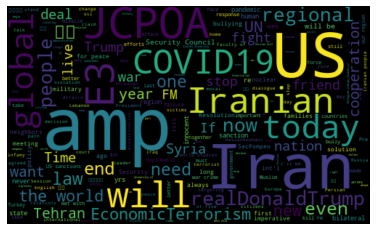

In [23]:
#Plot the Word Cloud
all_words = ''.join([twts for twts in df['tweets_fixed']])
WordCloud = WordCloud(width = 500, height= 300, random_state = 21, 
                      max_font_size =100).generate(all_words)
plt.imshow(WordCloud, interpolation= "bilinear")
plt.axis('off')
plt.show

## Measuring Javed Zarif's Polarity & Subjectivity

In [24]:
#Create a function to get 'subjectivity' and 'polarity'

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

#Create two new columns
df['subjectivity'] = df['tweets_fixed'].apply(get_subjectivity)
df['polarity'] = df['tweets_fixed'].apply(get_polarity)

#Show the new dataframe
df

,Tweets,tweets_fixed,subjectivity,polarity
0,أبارك للأخ و الصدیق الحمیم معالي السيد بدربن‌ح...,أبارك للأخ و الصدیق الحمیم معالي السيد بدربن‌ح...,0.000000,0.000000
1,"67 years ago today, US/UK tried to suffocate t...","67 years ago today, US/UK tried to suffocate t...",0.625000,-0.425000
2,I'll be delivering the fourth of five online t...,I'll be delivering the fourth of five online t...,0.250000,0.068182
3,.@AmbJohnBolton has repeated today what he sai...,.@AmbJohnBolton has repeated today what he sai...,0.450000,0.100000
4,"""Pirates of the Caribbean"" have their own judg...","""Pirates of the Caribbean"" have their own judg...",0.592857,-0.145238
...,...,...,...,...
195,Grateful to PM @ImranKhanPTI for his efforts t...,Grateful to PM @ImranKhanPTI for his efforts t...,0.375000,-0.125000
196,Iran's Leader has long made it abundantly clea...,Iran's Leader has long made it abundantly clea...,0.391667,0.025000
197,The Adana Agreement between Turkey and Syria—s...,The Adana Agreement between Turkey and Syria—s...,0.500000,0.500000
198,@FT We all have grievances about the past.\n\n...,@FT We all have grievances about the past.\n\n...,0.225000,-0.025000


In [25]:
#Create a function to denote the positive, negative, and neutral analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    if score == 0:
        return 'Neutral'
    if score > 0:
        return 'Positive'
    
df['Analysis'] = df['polarity'].apply(getAnalysis)

#Show df
df

,Tweets,tweets_fixed,subjectivity,polarity,Analysis
0,أبارك للأخ و الصدیق الحمیم معالي السيد بدربن‌ح...,أبارك للأخ و الصدیق الحمیم معالي السيد بدربن‌ح...,0.000000,0.000000,Neutral
1,"67 years ago today, US/UK tried to suffocate t...","67 years ago today, US/UK tried to suffocate t...",0.625000,-0.425000,Negative
2,I'll be delivering the fourth of five online t...,I'll be delivering the fourth of five online t...,0.250000,0.068182,Positive
3,.@AmbJohnBolton has repeated today what he sai...,.@AmbJohnBolton has repeated today what he sai...,0.450000,0.100000,Positive
4,"""Pirates of the Caribbean"" have their own judg...","""Pirates of the Caribbean"" have their own judg...",0.592857,-0.145238,Negative
...,...,...,...,...,...
195,Grateful to PM @ImranKhanPTI for his efforts t...,Grateful to PM @ImranKhanPTI for his efforts t...,0.375000,-0.125000,Negative
196,Iran's Leader has long made it abundantly clea...,Iran's Leader has long made it abundantly clea...,0.391667,0.025000,Positive
197,The Adana Agreement between Turkey and Syria—s...,The Adana Agreement between Turkey and Syria—s...,0.500000,0.500000,Positive
198,@FT We all have grievances about the past.\n\n...,@FT We all have grievances about the past.\n\n...,0.225000,-0.025000,Negative


In [26]:
#Print all the positive tweets
j =1
sorted_DF = df.sort_values(by = 'polarity')
for i in range(0, sorted_DF.shape[0]):
    if (sorted_DF['Analysis'][i] == 'Positive'):
        print(str(j) + sorted_DF['Tweets'][i])
        print()  #print a new line
        j = j+1
      

1I'll be delivering the fourth of five online talks at Faculty of World Studies, University of Tehran, today, Aug 17, 12:30-13:15 UTC

Topic: End of Hegemony

Live Instagram @iranian_studies_ut 

2.@AmbJohnBolton has repeated today what he said on May 8, 2018, while National Security Advisor in the Trump administration.

At least he is consistent—a trait notably absent in this US administration.

US recourse to Dispute Resolution Mechanism in 2231 has NO LEG TO STAND ON. 

3The first three (of five) talks on "The World in Transition" that I've delivered at the Faculty of World Studies, University of Tehran, are available here: 

First Session:


Second Session:


Third Session:


4I'll be delivering the third of five online talks at Faculty of World Studies, University of Tehran, today, Aug 10, 12:30-13:15 UTC

Topic: Power Shifts and New Players in the Transitional Period

Live Instagram @iranian_studies_ut

Watch 2nd session @ 

5Reiterated Iran's strong and steadfast solidarity with

In [27]:
#Let's see Negative Tweets in new df
j = 1
sorted_DF = df.sort_values(by = 'polarity')
for i in range(0, sorted_DF.shape[0]):
    if (sorted_DF['Analysis'][i] == 'Negative'):
        print(str(j) + ')' + sorted_DF['Tweets'][i])
        print()  #print a new line
        j = j+1

1)67 years ago today, US/UK tried to suffocate the Iranian people’s demand for dignity in a coup overthrowing their elected government. 

Since 1979, the US has desperately tried to resuscitate the past. Yet it keeps getting humiliated by the Iranian people. 

Time to change tack?

2)"Pirates of the Caribbean" have their own judges and courts now.

Sadly for them, stolen booty wasn't Iran's. Fuel was sold F.O.B. Persian Gulf. Ship and flag weren't ours either.

Hollow, cheap propaganda doesn’t deflect from miserable failure of US diplomatic malpractice at UN.

3)US is so desperate to show support for its struggle to illegally extend arms restrictions on Iran that it clings to the personal position of GCC SG—obtained thru coercion—as regional consensus.

All knew that most in the region—even in GCC—do NOT subscribe to this.

Here's proof: 

4)I just published Using Security Council to Destroy Security Council 

5)75 years ago today, the US gained the infamy of becoming the 1st and ONLY 

## Sentiment Analysis  

### Visualize Tweets by Minister Zarif

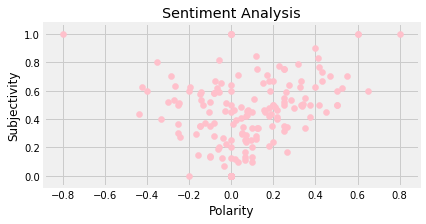

In [28]:
#Plot the polarity and subjectivity
plt.figure(figsize=(6,3)) 
for i in range(0, sorted_DF.shape[0]): 
    plt.scatter(df['polarity'][i], df['subjectivity'][i], color = 'Pink') 

plt.title ('Sentiment Analysis' ) 
plt.xlabel ('Polarity') 
plt.ylabel ('Subjectivity')     
plt.show()
    

In [29]:
# Get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

#round ((ptweets.shape[0] / df.shape[0])*100,1)

print(ptweets)

2      I'll be delivering the fourth of five online t...
3      .@AmbJohnBolton has repeated today what he sai...
10     The first three (of five) talks on "The World ...
11     I'll be delivering the third of five online ta...
17     Reiterated Iran's strong and steadfast solidar...
                             ...                        
188    Our response to US EconomicTerrorism &amp; bla...
191    Contrary to its deceptive claims, new US regul...
192    Met with Yemen’s Mohammad Abdul-Salam in Tehra...
196    Iran's Leader has long made it abundantly clea...
197    The Adana Agreement between Turkey and Syria—s...
Name: Tweets, Length: 96, dtype: object


In [30]:
round ((ptweets.shape[0] / df.shape[0])*100,1)

48.0

In [31]:
# Get the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

#round ((ptweets.shape[0] / df.shape[0])*100,1)

print(ntweets)

1      67 years ago today, US/UK tried to suffocate t...
4      "Pirates of the Caribbean" have their own judg...
7      US is so desperate to show support for its str...
8      I just published Using Security Council to Des...
12     75 years ago today, the US gained the infamy o...
27     As we mark EidAlAdha (Feast of the Sacrifice),...
35     Productive talks in Baghdad with PM @MAKadhimi...
37     25 yrs ago today, SrebrenicaGenocide began as ...
39     Don't believe the hype: Iran triggered JCPOA D...
43     The US isn't merely violating JCPOA and bullyi...
45     .@SecPompeo is so desperate to mislead the wor...
46     E3 must stop public face-saving &amp; muster t...
48     Iran &amp; Russia are "determined to deal with...
50     Productive talks with my friend @MevlutCavusog...
51     International Criminal COURT now blackmailed b...
53     US has tried to heighten tension w/ Iran &amp;...
54     We achieved humanitarian swap *despite* your s...
58     Some don't think BlackLi

In [32]:
round ((ntweets.shape[0] / df.shape[0])*100,1)

24.5

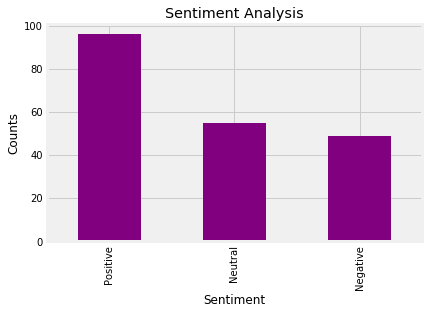

In [33]:
#Show the value counts
df['Analysis'].value_counts()

#Plot and show
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel ('Counts')
df['Analysis'].value_counts().plot(kind='bar', color = 'Purple')
plt.show()

In [34]:
#What did I wrong: not seeing new columns "id", 'retweets'
class TweetAnalyzer():
    """
    Functionality for analyzing and categorizing content from tweets.
    """
    def tweets_to_data_frame(self, tweets):
        df = pd.DataFrame(data=[tweet.text for tweet in zarif_tweets], columns=['Tweets'])

        df['id'] = np.array([tweet.id for tweet in zarif_tweets])
        df['len'] = np.array([len(tweet.text) for tweet in zarif_tweets])
        df['date'] = np.array([tweet.created_at for tweet in zarif_tweets])
        df['source'] = np.array([tweet.source for tweet in zarif_tweets])
        df['likes'] = np.array([tweet.favorite_count for tweet in zarif_tweets])
        df['retweets'] = np.array([tweet.retweet_count for tweet in zarif_tweets])
df

,Tweets,tweets_fixed,subjectivity,polarity,Analysis
0,أبارك للأخ و الصدیق الحمیم معالي السيد بدربن‌ح...,أبارك للأخ و الصدیق الحمیم معالي السيد بدربن‌ح...,0.000000,0.000000,Neutral
1,"67 years ago today, US/UK tried to suffocate t...","67 years ago today, US/UK tried to suffocate t...",0.625000,-0.425000,Negative
2,I'll be delivering the fourth of five online t...,I'll be delivering the fourth of five online t...,0.250000,0.068182,Positive
3,.@AmbJohnBolton has repeated today what he sai...,.@AmbJohnBolton has repeated today what he sai...,0.450000,0.100000,Positive
4,"""Pirates of the Caribbean"" have their own judg...","""Pirates of the Caribbean"" have their own judg...",0.592857,-0.145238,Negative
...,...,...,...,...,...
195,Grateful to PM @ImranKhanPTI for his efforts t...,Grateful to PM @ImranKhanPTI for his efforts t...,0.375000,-0.125000,Negative
196,Iran's Leader has long made it abundantly clea...,Iran's Leader has long made it abundantly clea...,0.391667,0.025000,Positive
197,The Adana Agreement between Turkey and Syria—s...,The Adana Agreement between Turkey and Syria—s...,0.500000,0.500000,Positive
198,@FT We all have grievances about the past.\n\n...,@FT We all have grievances about the past.\n\n...,0.225000,-0.025000,Negative


In [35]:
#Review subjectivity and polarity of Zarif
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df['polarity'] = df['tweets_fixed'].apply(pol)
df['subjectivity'] = df['tweets_fixed'].apply(sub)
df

,Tweets,tweets_fixed,subjectivity,polarity,Analysis
0,أبارك للأخ و الصدیق الحمیم معالي السيد بدربن‌ح...,أبارك للأخ و الصدیق الحمیم معالي السيد بدربن‌ح...,0.000000,0.000000,Neutral
1,"67 years ago today, US/UK tried to suffocate t...","67 years ago today, US/UK tried to suffocate t...",0.625000,-0.425000,Negative
2,I'll be delivering the fourth of five online t...,I'll be delivering the fourth of five online t...,0.250000,0.068182,Positive
3,.@AmbJohnBolton has repeated today what he sai...,.@AmbJohnBolton has repeated today what he sai...,0.450000,0.100000,Positive
4,"""Pirates of the Caribbean"" have their own judg...","""Pirates of the Caribbean"" have their own judg...",0.592857,-0.145238,Negative
...,...,...,...,...,...
195,Grateful to PM @ImranKhanPTI for his efforts t...,Grateful to PM @ImranKhanPTI for his efforts t...,0.375000,-0.125000,Negative
196,Iran's Leader has long made it abundantly clea...,Iran's Leader has long made it abundantly clea...,0.391667,0.025000,Positive
197,The Adana Agreement between Turkey and Syria—s...,The Adana Agreement between Turkey and Syria—s...,0.500000,0.500000,Positive
198,@FT We all have grievances about the past.\n\n...,@FT We all have grievances about the past.\n\n...,0.225000,-0.025000,Negative


## TFIDF
Implement Term Frequency-Inverse Document Frequency for Clustering.

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
#Substitute 'emma_pars' with our text: fixed tweets 'tweets_fixed'
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test = train_test_split(df['tweets_fixed'], test_size=0.4, random_state=0)

vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the tweets
                             min_df=2, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )

In [38]:
#Applying the vectorizer
tweets_fixed_tfidf = vectorizer.fit_transform(df['tweets_fixed'])
print("Number of features: %d" % tweets_fixed_tfidf.get_shape()[1])

#splitting into training and test sets
X_train_tfidf, X_test_tfidf= train_test_split(tweets_fixed_tfidf, test_size=0.4, random_state=0)


#Reshapes the vectorizer output into something people can read
X_train_tfidf_csr = X_train_tfidf.tocsr()

#number of paragraphs
n = X_train_tfidf_csr.shape[0]

#A list of dictionaries, one per paragraph
tfidf_by_tweet = [{} for _ in range(0,n)]

#List of features
terms = vectorizer.get_feature_names()
#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*X_train_tfidf_csr.nonzero()):
    tfidf_by_tweet[i][terms[j]] = X_train_tfidf_csr[i, j]

#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.
print('Original sentence:', X_train[1])
print('Tf_idf vector:', tfidf_by_tweet[1])

Number of features: 711
Original sentence: 67 years ago today, US/UK tried to suffocate the Iranian people’s demand for dignity in a coup overthrowing their elected government. 

Since 1979, the US has desperately tried to resuscitate the past. Yet it keeps getting humiliated by the Iranian people. 

Time to change tack?
Tf_idf vector: {'fulfill': 0.2677139428402612, 'courage': 0.2833772205911024, 'muster': 0.2833772205911024, 'bullying': 0.22997451501010802, 'face': 0.2677139428402612, 'e3': 0.36575688935848266, 'duties': 0.2555645607367609, 'stop': 0.20789836493079603, 'jcpoa': 0.16374606477217202, 'state': 0.2555645607367609, 'amp': 0.33798174184578655, 'position': 0.2833772205911024, 'failure': 0.2372448300259493, 'iran': 0.11266058061526218, 'trump': 0.21263582859565527}


### Apply LSA Model to Training Set
We are applying the Latent Semantic Analysis, instead of the Vector Space Model, to conduct a tweet similarity analysis because our body of 200 tweets is long. Also, LSA recognizes the occurence of synonyms rather than counting them as different from each other. In addition to context, LSA considers how a word can be used for slightly different meanings. The goal is to identify clusters of terms that reflect topics appearing in Zarif's tweets.

**Note: LSA is the process of applying feature dimension reduction to a tf-idf term-document matrix.
Since we don't want to mean-center our variables, which means we lose sparsity, we will use another dimension reduction method aside from Pincipal Compenent Analysis. This is called Singular Value Decomposition (SVD). 

#### Dimension reduction: Singular Value Decomposition (SVD)
We have our vectors, with one vector per tweet. Will use a dimension reduction technique called Singular Value Decomposition (SVD) function from sklearn rather than PCA because we don't want to mean-center our variables (and thus lose sparsity).

In [39]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#Our SVD data reducer.  We are going to reduce the feature space from 1379 to 130. 
 ## Do we subsitute 'svd' as our pca for TNSE clustering?
svd = TruncatedSVD(130)
lsa = make_pipeline(svd, Normalizer(copy=False))

# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(X_train_tfidf)

variance_explained = svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of paragraphs our solution considers similar, for the first five identified topics
#paras_by_component = pd.DataFrame(X_train_lsa,index=X_train)
tweets_by_component = pd.DataFrame(X_train_lsa,index=X_train)
for i in range(5):
    print('Component {}:'.format(i))
    #print(paras_by_component.loc[:,i].sort_values(ascending=False)[0:10])
    print(tweets_by_component.loc[:,i].sort_values(ascending=False)[0:10])


Percent variance captured by all components: 99.99999999999993
Component 0:
tweets_fixed
Iran &amp; Russia are "determined to deal with unilateral &amp; illegal approaches to resolve global crises.”\n\nFrom joint statement with FM Lavrov in Moscow today, where we reaffirmed commitment to int'l law as US &amp; cronies attack foundation of int'l relations at IAEA &amp; Security Council.           0.379941
The world is learning what Iran has known &amp; experienced all along: US regime's bullying, threatening &amp; vainglorious blathering isn’t just an addiction: it kills people.\n\nLike "maximum pressure" against Iran, the shameful defunding WHO amid a pandemic will live in infamy.                            0.373271
US has tried to heighten tension w/ Iran &amp; bully others to follow. \n\nBut having admitted to:\n-Terror assassination in Iraq\n-Complicity in war crimes in Yemen &amp; Palestine\n-Piracy\n-Breaching JCPOA, UNSCR 2231, &amp; IAEA decisions\n\nIt retains NO right to abuse 

### Sentence similarity
We can also look at how similar various tweets are to one another. For example, here are the similarity scores (as a heatmap) of the first 10 tweets in the training set:

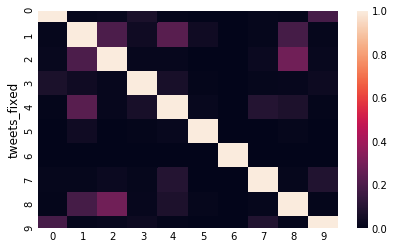

Key:
0 Pleased to be in Turkey, attending 24th ministerial meeting of the ECO.

In keeping with Iran’s foreign policy that posits our neighbors should always come first, regional cooperation remains a priority.  

We hope this cooperation can be welcomed by neighbors to our south, too.
1 E3 must stop public face-saving &amp; muster the courage to state publicly what they admit privately: their failure to fulfill even own JCPOA duties due to total impotence in resisting US bullying
Behind facade, E3 are accessories to Trump &amp; Netanyahu—&amp; in no position to counsel Iran 
2 E3's response to US attack on JCPOA has been to cut trade/investment in Iran while embargoing our oil.

Told Raisina2020 it's sad that biggest economy has allowed itself to be bullied into violating own obligations. JCPOA's future depends on E3, not Iran.

3 Grateful to PM @ImranKhanPTI for his efforts toward peace in the PersianGulf

Reiterating HOPE (Hormuz Peace Endeavour) I again invite colleagues in the lea

In [40]:
# Compute document similarity using LSA components
similarity = np.asarray(np.asmatrix(X_train_lsa) * np.asmatrix(X_train_lsa).T)

#Only taking the first 10 tweets
sim_matrix = pd.DataFrame(similarity,index=X_train).iloc[0:10,0:10]

#Making a plot
ax = sns.heatmap(sim_matrix,yticklabels=range(10))
plt.show()

#Generating a key for the plot.
print('Key:')
for i in range(10):
    print(i,sim_matrix.index[i])

### Apply LSA Model to Test Set 

In [41]:
# Run SVD on the test data, then project the test data.
X_test_lsa = lsa.fit_transform(X_test_tfidf)

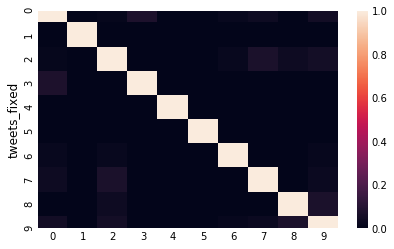

Key:
0 Our thoughts and prayers are with the great and resilient people of Lebanon. 

As always, Iran is fully prepared to render assistance in any way necessary. 

Stay strong, Lebanon.

🖤🇱🇧
1 Substantive, friendly and frank summit between President @HassanRouhani and Prime Minister @AbeShizo: further strengthening bilateral, regional and global cooperation. 

Also grateful to our Japanese hosts for celebrating the winter solstice with us. Yalda 
2 Saddened to hear of the passing of Javier Pérez de Cuéllar, UN Secretary General from 1982 to 91. 

As a young diplomat, I came to appreciate his skill—he oversaw the end to many conflicts, including a cease fire in the war Saddam imposed on Iran. 

My condolences to his family.
3 "If we are to make the world that will emerge from COVID19 a better one, we must seize the opportunity to forge new path." 

My thoughts on the occasion of Nowruz, the Persian New Year. 

Videos 

English:


Persian: 

4 Going home 
5 ایران لا تری جدوی فی استمرار 

In [42]:
# Compute document similarity using LSA components
similarity = np.asarray(np.asmatrix(X_test_lsa) * np.asmatrix(X_test_lsa).T)

#Only taking the first 10 tweets
sim_matrix = pd.DataFrame(similarity,index = X_test).iloc[0:10,0:10]

#Making a plot
ax = sns.heatmap(sim_matrix,yticklabels = range(10))
plt.show()

#Generating a key for the plot.
print('Key:')
for i in range(10):
    print(i,sim_matrix.index[i])

## Is this part necessary? Locating Tweets to Visualize on Map

In [43]:
#drop unusuable topics/features
df_topics = df.dropna()

In [44]:
from tweetutilities import get_geocodes

ModuleNotFoundError: No module named 'tweetutilities'

In [ ]:
#Create the location listener
from location listener import LocationListener

In [ ]:
counts['locations']

In [ ]:
#Map w/Folium
worldmap = folium.Map(location=['latitude','longiture'], 
                      tiles = 'Stamen Terrain',
                      zoom_start =5,
                      detect_retina = True
                     )

## Clustering with PCA: PCA to Reduce Dimensionality  (If we use LSA, then we don't need to use PCA below.)
We use PCA Explained Variance plot below to help determine the right level of components. 

In [ ]:
#select only topical attributes for clustering
topics_cols = [#'''Crossing',
       #'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling']
df_topics = df[topics_cols]
len(df_topics.columns)

In [ ]:
#Use df2 to represent Javed Zarif and Donald tweets
from sklearn.decomposition import PCA
pca = PCA().fit(df_topics)

In [ ]:
#Get SVD Ratio
svdratio = svd.explained_variance_ratio_
trace = go.Scatter(x=np.arange(len(svcratio)),y=np.cumsum(pcaratio))
df_topics = [trace]
layout = dict(title="Javed's Polarized Tweets - PCA Explained Variance || __% achieved at 5 components")
fig = dict(df2=df2, layout=layout)
#iplot(fig)

In [ ]:
#define get_tweets():
def get_tweets(keyword: str) -> List[str]:
    all_tweets = []
    for tweet in tweepy.cursor(api.search, q=keyword, tweet_mode ='extended', lang = 'en').items(10):
        all_tweets.append(tweet.full_text)
    return all_tweets

In [ ]:
results = api.search('whatever', lang='en')

In [ ]:
for result in results:
    print(result.text)

In [ ]:
result.text

In [ ]:
#define clean_tweets():
def clean_tweets(all_tweets: List[str]) -> List[str]:
    for tweet in all_tweets:
        tweets_clean.append(p.clean(tweet))
    return tweets_clean

In [ ]:
#def get_sentiment():
def get_sentiment(all_tweets: List[str]) -> List[float] :
    sentiment_scores = []
    for tweet in all_tweets:
        blob = TextBlob(tweet)
        sentiment_scores.append(blob.sentiment.polarity)
    return sentiment_scores

In [ ]:
def generate_average_sentiment_score(keyword: str) -> int:
    tweets = get_tweets(keyword)
    tweets_clean = clean_tweets(tweets)
    sentiment_scores = get_sentiments(tweets_clean)
    
    average_score = statistics.mean(sentiment_scores)
    return average_score

In [ ]:
if ___name__ == "__main__":
    
    print("How negative is the race discussion?")
    first_thing = import
    print("...or...")
    second_thing = input()
    print("\n")
    
    first_score = generate_average_sentiment_score(first_thing)
    second_score = generate_average_sentiment_score(second_thing)
    
    if (first_score > second_score):
        print ("Discussion on (first_thing) is more negative than the (second_thing)")
    else: 
        print("Discussion on (first_thing) is less negative than the (second_thing)")

## Visualizing Vectors: TSNE Plot
Using 'word2vec' allows us to identify similarities between words that never occur near one another in the tweets.

In [45]:
def tsne_plot(model):
    "Creates a TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='svd', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens) #SVD: substituted dimension reduction for 'pca'

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy =(x[i], y[i]),
                     xytext =(5, 2),
                     textcoords ='offset points',
                     ha ='right',
                     va ='bottom')
    plt.show()

In [52]:
#Substituted tweets_fixed_tfidf 
# then tweets_by_component for corpus 
print(tweets_by_component)
model = word2vec.Word2Vec(tweets_by_component, size=100, window=20, min_count=500, workers=4)
tsne_plot(model)


                                                             0    \
tweets_fixed                                                       
Pleased to be in Turkey, attending 24th ministe...  1.636446e-01   
E3 must stop public face-saving &amp; muster th...  3.584223e-01   
E3's response to US attack on JCPOA has been to...  2.596314e-01   
Grateful to PM @ImranKhanPTI for his efforts to...  2.155365e-01   
Grateful to @WHO &amp; friendly nations for sol...  2.390020e-01   
...                                                          ...   
Today is "Honoring Philanthropists' Day" in our...  1.599121e-01   
Met with Yemen’s Mohammad Abdul-Salam in Tehran...  2.244342e-01   
صَفْقَةُ القرنِ لَنْ تَمُرَّ\n\nإيرانْ سَتَبْقى... -1.323070e-16   
BoG should not allow JCPOA enemies to jeopardiz...  2.778310e-01   
Good to be in Kuala Lumpur with Pres. @HassanRo...  1.679506e-01   

                                                             1    \
tweets_fixed                                   

TypeError: 'int' object is not iterable

In [ ]:
## Use tweets_by_component
# sklearn tfidf
vectorizer = TfidfVectorizer()
sklearn_tfidf = vectorizer.fit_transform(tweets_by_component)

# Getting the word list.
terms = vectorizer.get_feature_names()

# Number of topics.
ntopics=len(newsgroups.target_names)

# Linking words to topics
def word_topic(tfidf, solution, wordlist):
    
    # Loading scores for each word on each topic/component.
    words_by_topic=tfidf.T * solution

    # Linking the loadings to the words in an easy-to-read way.
    components=pd.DataFrame(words_by_topic,index=wordlist)
    
    return components

# Extracts the top N words and their loadings for each topic.
def top_words(components, n_top_words):
    n_topics = range(components.shape[1])
    index= np.repeat(n_topics, n_top_words, axis=0)
    topwords=pd.Series(index=index)
    for column in range(components.shape[1]):
        # Sort the column so that highest loadings are at the top.
        sortedwords=components.iloc[:,column].sort_values(ascending=False)
        # Choose the N highest loadings.
        chosen=sortedwords[:n_top_words]
        # Combine loading and index into a string.
        chosenlist=chosen.index +" "+round(chosen,2).map(str) 
        topwords.loc[column]=chosenlist
    return(topwords)

# Number of words to look at for each topic.
n_top_words = 10

## Project 2A: Donald Tr ump Tweets Review
Additional Source: FiveThirtyEight https://fivethirtyeight.com/features/the-worlds-favorite-donald-trump-tweets/

## Load Data set

In [47]:
consumer_key = 'R8y38TnjdzbUMhXmiqrdOlFNo'
consumer_secret = '0SHVRVqighg3nbvU72303AVCNmyue6usBukhB7xiUZlL5wo3nE'
access_token = ''
access_token_secret = ''

#Create the authentication object
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token = (access_token, access_token_secret)

#Create the API object
api = tweepy.API(auth)
public_tweets = api.search('Donald Trump')
for tweet in public_tweets:
    print(tweet.text)
    analysis = TextBlob(tweet.text)
    print(analysis.sentiment)

RT @ProjectLincoln: Rick Gates: Convicted.
Paul Manafort: Convicted.
George Papadopoulos: Convicted.
Mike Flynn: Convicted.
Michael Cohen:…
Sentiment(polarity=0.0, subjectivity=0.0)
RT @ProjectLincoln: Rick Gates: Convicted.
Paul Manafort: Convicted.
George Papadopoulos: Convicted.
Mike Flynn: Convicted.
Michael Cohen:…
Sentiment(polarity=0.0, subjectivity=0.0)
RT @ProjectLincoln: Rick Gates: Convicted.
Paul Manafort: Convicted.
George Papadopoulos: Convicted.
Mike Flynn: Convicted.
Michael Cohen:…
Sentiment(polarity=0.0, subjectivity=0.0)
RT @RCamposDuffy: “Trump will destroy our democracy!” says man who used CIA, DOJ, &amp; FBI to destroy his political enemies.  https://t.co/AyJ…
Sentiment(polarity=-0.15, subjectivity=0.03333333333333333)
RT @HillaryClinton: I wish Donald Trump knew how to be a president, because America needs a president right now.

Let's save our country, a…
Sentiment(polarity=0.2857142857142857, subjectivity=0.5357142857142857)
Judge rules against Trump in tax rec

In [48]:
#Extract 200 Tweets from the Twitter User
donald_tweets = api.user_timeline(screen_name = 'realDonaldTrump', count = 200, 
                                 lang ='en', tweet_mode = 'extended')

#Show the 10 most recent tweets
print("Show the 10 most recent tweets: \n")
i =1
for tweet in donald_tweets[0:9]:
    print (str(i) +') '+ tweet.full_text + '\n')
    i = i + 1

Show the 10 most recent tweets: 

1) RT @TeamTrump: TOMORROW: Join Making the Case hosted by @kimguilfoyle with special guest @DonaldJTrumpJr at 8:00 pm ET!

RSVP: https://t.co…

2) RT @TeamTrump: TOMORROW: Join Team Trump LIVE for 'The Real Joe Biden' hosted by @BorisEP and @KatrinaPierson at 11:00 pm ET!

RSVP: https:…

3) RT @TrumpWarRoom: Democrats want a world without police, without prisons, and without virtually any sort of law enforcement.

These are tod…

4) RT @TrumpWarRoom: Democrats have become so extreme that standing for the Pledge of Allegiance and National Anthem is part of “our terrible,…

5) RT @realDonaldTrump: Welcome, Barack and Crooked Hillary. See you on the field of battle! https://t.co/ZrTKXcc6aU

6) RT @realDonaldTrump: My great honor!!!

7) RT @realDonaldTrump: BUT DIDN’T SHE CALL HIM A RACIST??? DIDN’T SHE SAY HE WAS INCOMPETENT???

8) RT @jacobkschneider: Update after night three: no change

9) RT @BorisEP: MUST READ from ⁦@TimMurtaugh⁩:

⁦⁦@realDonaldTrump

In [49]:
#Determining polarity of 200 tweets from Donald Trump
api = tweepy.API(auth)
donald_tweets = api.search('@realDonaldTrump')
for tweet in donald_tweets:
    print(tweet.text)
    analysis = TextBlob(tweet.text)
    print(analysis.sentiment)

@LindseyGrahamSC @realDonaldTrump What I saw last night was greatness thats been missing for almost 4 yrs.
Sentiment(polarity=-0.1, subjectivity=0.058333333333333334)
RT @LittleMike1977: @JoeBiden .@realDonaldTrump here’s a awesome Latina supporter from Nevada who wanted to tell everyone a few reasons why…
Sentiment(polarity=0.4, subjectivity=0.55)
RT @HollyWilhelm4: After a 3 night bashing of our favorite president @realDonaldTrump you would think the communists, ie democrats would re…
Sentiment(polarity=0.5, subjectivity=1.0)
RT @SierraWhiskee: I live in America, Land of the Free and I'll VOTE for @realDonaldTrump in person on November 3rd! 

How about you guys?
Sentiment(polarity=0.1787878787878788, subjectivity=0.43333333333333335)
@realDonaldTrump https://t.co/H86YhOfb2u
Sentiment(polarity=0.0, subjectivity=0.0)
RT @realDonaldTrump: I disagreed with doing this very small (tiny) section of wall, in a tricky area, by a private group which raised money…
Sentiment(polarity=-0.10833333

In [50]:
#Create a second dataframe with @realdonaldtrump a column and label column as 'Tweets_drumpf'
import pandas as pd
donald_df = pd.DataFrame([tweet.full_text for tweet in donald_tweets], columns = ['Tweets_d'])
donald_df.head(10)

AttributeError: 'Status' object has no attribute 'full_text'

In [ ]:
type(texts)

In [ ]:
# Python program to convert a list to string using join() function 
    
# Function to convert   
def listToString(texts):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(texts)) 
        
        
# Driver code     
 
print(listToString(texts))

In [ ]:
def listToString(texts2):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(texts2)) 
        
        
# Driver code     
 
print(listToString(texts2))

In [ ]:
def listToString(texts3):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(texts3)) 
        
        
# Driver code     
 
print(listToString(texts3))

### Clean Text
Source: https://github.com/adashofdata/nlp-in-python-tutorial/blob/master/1-Data-Cleaning.ipynb

### Remove Stopwords
https://www.geeksforgeeks.org/removing-stop-words-nltk-python/